# Domain Health Care

## About the Data

Medical research university X is undergoing a deep research on patients with certain conditions.
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by
the client by providing different datasets to the AI team for developing a AIML model which can predict the
condition of the patient depending on the received test results

The data consists of biomechanics features of the patients according to their current
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and
orientation of the condition to their body part.
1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_degree
7. Class

## Making the necessary imports

In [6]:
# Making the necessary Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Imports for classifier techniques
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Necessary Imports for cross validation techniques
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Necessary imports for scaling
from sklearn.preprocessing import MinMaxScaler

#Necessary imports for Label encoding
from sklearn.preprocessing import LabelEncoder

#Necessary imports for train test split
from sklearn.model_selection import train_test_split

#Necessary imports for Metrics
from sklearn import metrics
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

#Necessary imports for Oversampling technique
from imblearn.over_sampling import SMOTE

In [7]:
# Importing Data files
df_1 = pd.read_csv('Part1 - Normal.csv')
df_2 = pd.read_csv('Part1 - Type_H.csv')
df_3 = pd.read_csv('Part1 - Type_S.csv')
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)


(100, 7)
(60, 7)
(150, 7)


In [9]:
df_1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [10]:
df_2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [11]:
df_3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


since the columns are same we need to stack the data vertically into the new data frame

In [8]:
final_df = pd.concat([df_1, df_2,df_3], axis=0)
final_df.shape

(310, 7)

In [12]:
final_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


Checking for the data types in the data frame

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


Checking for the null and missing values in the data frame

In [14]:
final_df.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

Checking for the duplicate values in the dataframe

In [15]:
final_df[final_df.index.duplicated()==True]

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H
...,...,...,...,...,...,...,...
95,66.804796,14.551602,72.084912,52.253195,82.456038,41.685474,Type_S
96,79.476978,26.732268,70.650982,52.744711,118.588669,61.700598,Type_S
97,44.216464,1.507075,46.110339,42.709390,108.629567,42.810481,Type_S
98,57.035097,0.345728,49.198003,56.689369,103.048698,52.165145,Type_S


From the above it can be observed that the index values are duplicated, hence to overcome this we are using the reset_index()
function

In [16]:
final_df=final_df.reset_index()

In [17]:
final_df[final_df.index.duplicated()==True]

,index,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class


Checking for the final_df

In [20]:
final_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


Dropping unnecessary column from the data frame

In [19]:
final_df=final_df.drop('index',axis=1)

Checking for the dataframe after dropping the columns

In [21]:
final_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


Checking the distribution of target variable

In [22]:
class_df= pd.DataFrame(final_df['Class'].value_counts()).reset_index()
class_df.columns=['Class','Count']
class_df.head()

,Class,Count
0,Type_S,133
1,Normal,73
2,Type_H,37
3,Nrmal,27
4,type_h,23


In the above classes, we can see that Normal and Nrml are same, Type_H and type_h are same. Hence, replacing the values 
in the final data frame.

In [23]:
replacement_mapping_dict = {
    "Nrmal": "Normal",
    "type_h": "Type_H",
    "tp_s":"Type_S"
}
final_df.loc[:,'Class']=final_df["Class"].replace(replacement_mapping_dict,regex=True)

In [24]:
final_df['Class'].unique()

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

Statistical analysis on the data

In [25]:
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


#### 1. Uni-Variate analysis Visualisation

Since the variables P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree are continous plotting the histogram for the variables
From the below plot it can be understood that P_incidence is bi-modal and skewed towards the left , and there are outliers  between 120-140
s-Degree is skewed towards the left and there are outliers at 400
s-slope is skewed towards the left and there are outliers at 120-140

<Figure size 432x288 with 0 Axes>

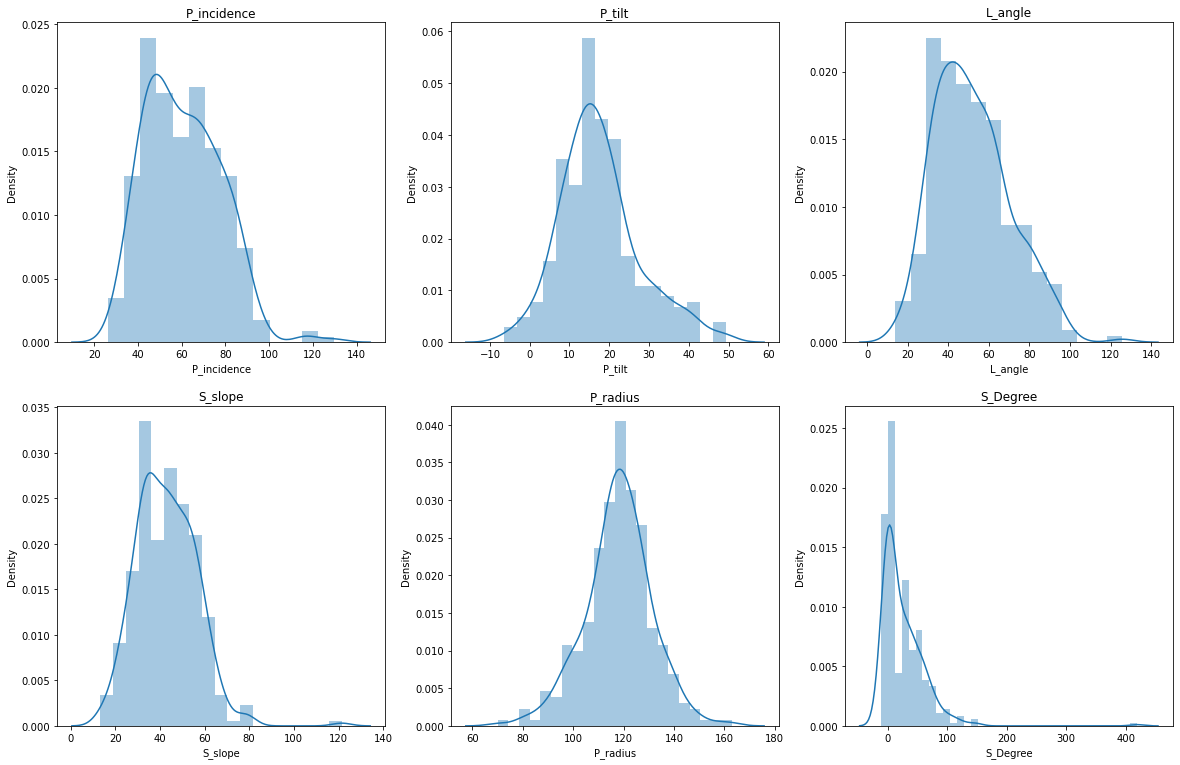

In [26]:

fig = plt.figure()
plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
sns.distplot(final_df.P_incidence, kde=True)
plt.title('P_incidence')

plt.subplot(3, 3, 2)
sns.distplot(final_df.P_tilt, kde=True)
plt.title('P_tilt')

plt.subplot(3, 3, 3)
sns.distplot(final_df.L_angle, kde=True)
plt.title('L_angle')

plt.subplot(3, 3, 4)
sns.distplot(final_df.S_slope, kde=True)
plt.title('S_slope')

plt.subplot(3, 3, 5)
sns.distplot(final_df.P_radius, kde=True)
plt.title('P_radius')

plt.subplot(3, 3, 6)
sns.distplot(final_df.S_Degree, kde=True)
plt.title('S_Degree')


plt.show();


Since class is a categorical variable, plotting the categorical variable

In [47]:
class_df=pd.DataFrame(final_df['Class'].value_counts()).reset_index()
class_df

,index,Class
0,Type_S,150
1,Normal,100
2,Type_H,60


In [48]:
class_df=class_df.rename(columns={"index":"Type","Class":"Count"})
class_df

,Type,Count
0,Type_S,150
1,Normal,100
2,Type_H,60


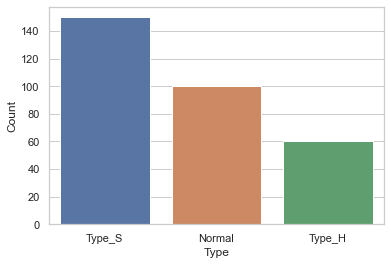

In [49]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Type", y="Count", data=class_df)

Type-s is the class with the highest count.

#### 2. Bi-Variate Analysis

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

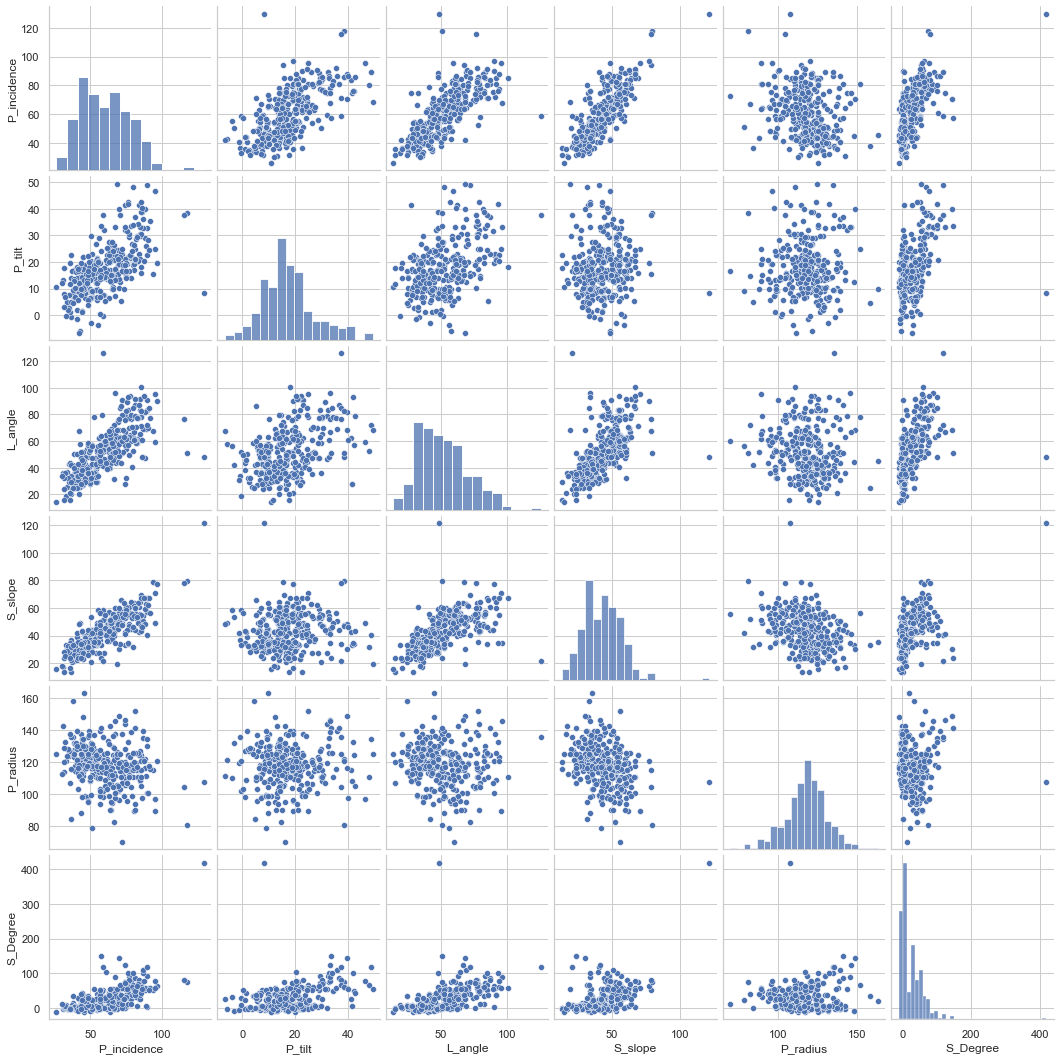

In [50]:
fig = plt.figure()
plt.figure(figsize=(20,20))
sns.pairplot(final_df)
plt.show()

From the below heat map it can be infered that S-Slope and P_incidence are highly correlated L_angle and P_incidence are highly correlated there is no significant correlation between any of the dependent variables and the target variable Class

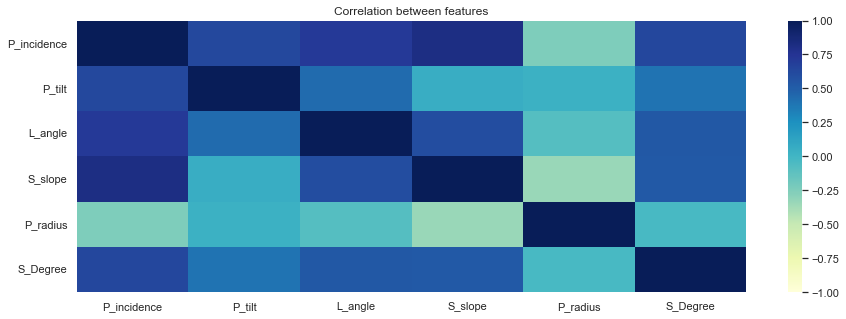

In [30]:
corr = final_df.corr() 
plt.figure(figsize=(15, 5))
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0)
plt.title('Correlation between features')
plt.show()

In [31]:
print(corr)

             P_incidence    P_tilt   L_angle   S_slope  P_radius  S_Degree
P_incidence     1.000000  0.629199  0.717282  0.814960 -0.247467  0.638743
P_tilt          0.629199  1.000000  0.432764  0.062345  0.032668  0.397862
L_angle         0.717282  0.432764  1.000000  0.598387 -0.080344  0.533667
S_slope         0.814960  0.062345  0.598387  1.000000 -0.342128  0.523557
P_radius       -0.247467  0.032668 -0.080344 -0.342128  1.000000 -0.026065
S_Degree        0.638743  0.397862  0.533667  0.523557 -0.026065  1.000000


Target balancing

In [35]:
class_df

,Count,Class
0,Type_S,150
1,Normal,100
2,Type_H,60


In [51]:
print("The percentage of class Type_S is ",round((class_df[class_df['Type']=='Type_S']['Count']/final_df.shape[0])*100,2))
print("The percentage of class Normal is ",round((class_df[class_df['Type']=='Normal']['Count']/final_df.shape[0])*100,2))
print("The percentage of class Type_ H  is ",round((class_df[class_df['Type']=='Type_H']['Count']/final_df.shape[0])*100,2))

The percentage of class Type_S is  0    48.39
Name: Count, dtype: float64
The percentage of class Normal is  1    32.26
Name: Count, dtype: float64
The percentage of class Type_ H  is  2    19.35
Name: Count, dtype: float64


The class Type_s has the highest occupancy

Segregating predictors vs target attributes


In [52]:
y= final_df['Class']
x=final_df.drop('Class',axis=1)

Performing Scaling using minmax scaler so that all the predictor variables are in a uniform scale.

In [53]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
x_scaled = scaler.fit_transform(x)
print(x_scaled)

[[0.11918038 0.42008545 0.18894186 0.07564174 0.61889719 0.04433149]
 [0.27750037 0.45588197 0.33650128 0.20900376 0.59968805 0.03039987]
 [0.17567027 0.27685776 0.29444598 0.20404948 0.6359725  0.03736575]
 ...
 [0.46242264 0.45329739 0.55513542 0.38777578 0.62720851 0.19656924]
 [0.59343686 0.48083755 0.71434322 0.4992155  0.54697379 0.20434951]
 [0.213259   0.41031825 0.19982692 0.17097054 0.26669718 0.09171756]]


Since the class data type is of different categories...creating dummy variables using label encoder 

In [54]:
le = LabelEncoder()
final_df['Class'] = le.fit_transform(final_df['Class'])

The data set is balanced

In [55]:
#splitting  the dataset into training and test datasets
# Transforming  data into features and target
X = np.array(final_df.drop('Class',axis=1) ) # # Predictor feature columns (6 X m)
y = np.array(final_df['Class'])# Predicted class (0,1,2) (1 X m)

# split into train and tes1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [56]:
print("Training-Predictor feature shape",X_train.shape)
print("Training-Predicted Class shape",y_train.shape)
print("Test-Predictor feature shape",X_test.shape)
print("Test-Predicted Class shape",y_test.shape)

Training-Predictor feature shape (217, 6)
Training-Predicted Class shape (217,)
Test-Predictor feature shape (93, 6)
Test-Predicted Class shape (93,)


# Logistic Regression

The P_incidence column has a high correlation to S-slope and L- angle, Hence, dropping the column from predictor values

In [82]:
X_log = np.array(final_df.drop(['Class','P_incidence'],axis=1) ) # # Predictor feature columns (6 X m)
y_log = np.array(final_df['Class'])# Predicted class (0,1,2) (1 X m)
# split into train and tes1
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify =y)

In [84]:
model = LogisticRegression(random_state=0)
model.fit(X_log_train, y_log_train)
y_log_predict = model.predict(X_log_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)
y_log_pred = model.predict(X_log_test)
print(metrics.classification_report(y_log_test, y_log_predict))

          0         1         2         3         4         5  intercept
0 -0.003003 -0.042664  0.017328  0.039660  0.064058 -0.092600  -7.273290
1  0.002739  0.070146 -0.060254 -0.067407 -0.034904 -0.078079   8.677763
2  0.000264 -0.027482  0.042926  0.027746 -0.029153  0.170679  -1.404473
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.75      0.67      0.71        18
           2       1.00      0.96      0.98        45

    accuracy                           0.88        93
   macro avg       0.85      0.84      0.84        93
weighted avg       0.89      0.88      0.88        93



<AxesSubplot:>

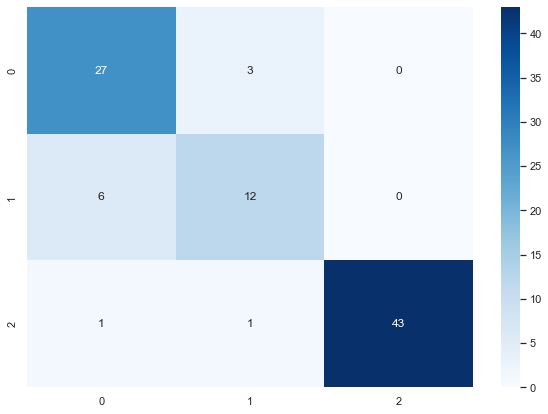

In [96]:
conf_mat = confusion_matrix(y_log_test, y_log_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

From the above it is evident that the logistic regression model is performing well for the class 0 and class 2. Howevwer, the prediction of class 1 is not satisfactory.

# Knn 

In [58]:
# Creating the prediction list for k=3
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
y_pred = knn.predict(X_test)
# evaluating accuracy
print(accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))


0.8494623655913979
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        30
           1       0.76      0.68      0.72        19
           2       0.95      0.95      0.95        44

    accuracy                           0.85        93
   macro avg       0.82      0.81      0.82        93
weighted avg       0.85      0.85      0.85        93



<AxesSubplot:>

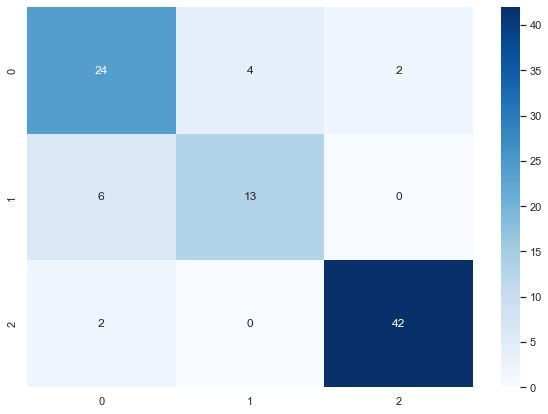

In [59]:
conf_mat = confusion_matrix(y_test, y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

Checking for the optimal k value

In [63]:
# creating odd list of K for KNN
myList = list(range(1,20))
neighbors = list(myList)
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 10


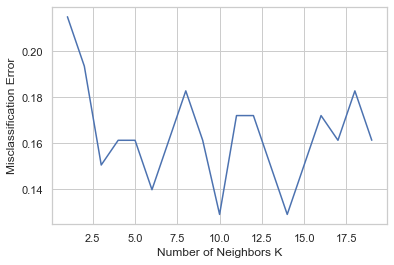

In [64]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [62]:
kf =KFold(n_splits=10, shuffle=True, random_state=42)
score = cross_val_score(KNeighborsClassifier(n_neighbors=10), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.80645161 0.87096774 0.80645161 0.87096774 0.74193548 0.80645161
 0.74193548 0.83870968 0.77419355 0.87096774]
Average score: 0.81


Printing the classification report and confusion matrix for the optimal value

In [65]:
knn_10 = KNeighborsClassifier(n_neighbors = 10)
# fitting the model
knn_10.fit(X_train, y_train)
# predict the response
y_pred_10 = knn_10.predict(X_test)
# evaluating accuracy
print(accuracy_score(y_test, y_pred_10))
print(metrics.classification_report(y_test, y_pred_10))


0.8709677419354839
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.92      0.63      0.75        19
           2       0.93      0.98      0.96        44

    accuracy                           0.87        93
   macro avg       0.87      0.83      0.84        93
weighted avg       0.88      0.87      0.87        93



<AxesSubplot:>

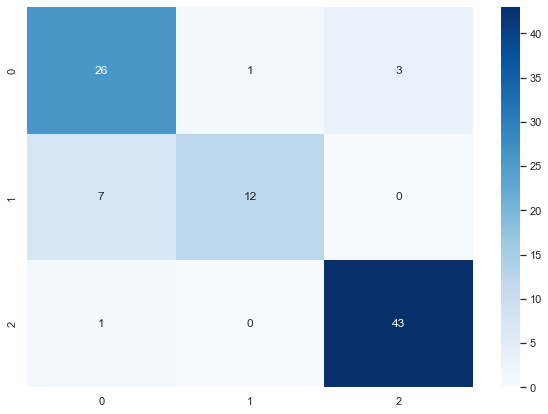

In [66]:
conf_mat = confusion_matrix(y_test, y_pred_10)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

There is an improvement in terms of prediction for class 0 and class1. However, we can observe that there is no improvement in prediction of class1

# Decision Tree Classifier

In [67]:
sTree = DecisionTreeClassifier(criterion = 'gini',max_depth=13)
sTree.fit(X_train,y_train)
y_tree_predict=sTree.predict(X_test)
accuracy_score(y_test,y_tree_predict)


0.7634408602150538

In [68]:
print(metrics.classification_report(y_test, y_tree_predict))

              precision    recall  f1-score   support

           0       0.66      0.63      0.64        30
           1       0.50      0.53      0.51        19
           2       0.95      0.95      0.95        44

    accuracy                           0.76        93
   macro avg       0.70      0.70      0.70        93
weighted avg       0.77      0.76      0.76        93



<AxesSubplot:>

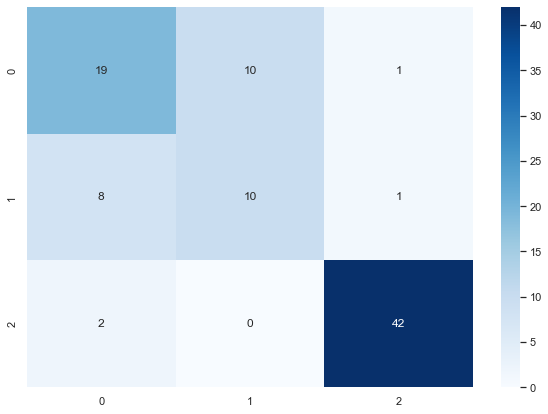

In [69]:
conf_mat = confusion_matrix(y_test, y_tree_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

The performance of decision tree is poor in comparision to the knn . Hence, Checking the random forest classifier

# Random Forest Classifier

In [70]:
rfc=RandomForestClassifier(n_estimators = 10,random_state= 42)
rfc.fit(X_train,y_train)
y_rfc_predict=sTree.predict(X_test)
accuracy_score(y_test,y_rfc_predict)
print(metrics.classification_report(y_test, y_rfc_predict))

              precision    recall  f1-score   support

           0       0.66      0.63      0.64        30
           1       0.50      0.53      0.51        19
           2       0.95      0.95      0.95        44

    accuracy                           0.76        93
   macro avg       0.70      0.70      0.70        93
weighted avg       0.77      0.76      0.76        93



<AxesSubplot:>

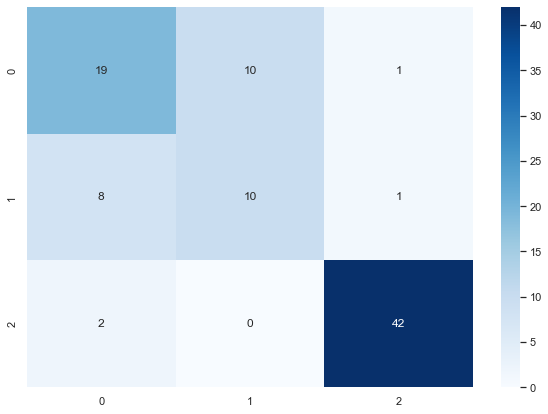

In [71]:
conf_mat = confusion_matrix(y_test, y_rfc_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

The rfc has a similar performance to decision tree.

# Gaussian Classifer

In [72]:
nbc=GaussianNB()
nbc.fit(X_train,y_train)
y_nbc_predict=sTree.predict(X_test)
print(metrics.classification_report(y_test, y_nbc_predict))

              precision    recall  f1-score   support

           0       0.66      0.63      0.64        30
           1       0.50      0.53      0.51        19
           2       0.95      0.95      0.95        44

    accuracy                           0.76        93
   macro avg       0.70      0.70      0.70        93
weighted avg       0.77      0.76      0.76        93



<AxesSubplot:>

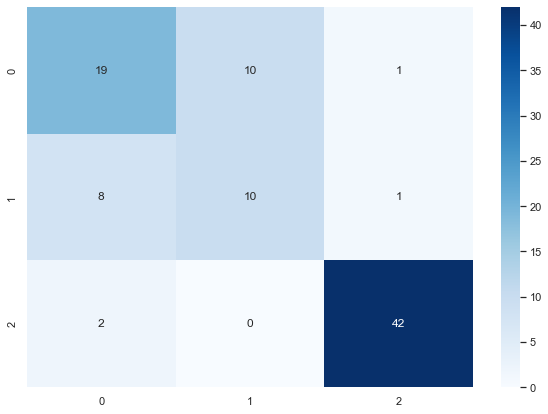

In [74]:
conf_mat = confusion_matrix(y_test, y_nbc_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

Gaussian Classifier performance is poorer in comparision to the rfc

# Multinomial NB

Performing scaling in the range of 0,1 as the multinomial NB requires the values to be in between 0 and 1

In [75]:
mM = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
mM.fit(X_train)
X_mM_train = mM.transform(X_train)
X_mM_test = mM.transform(X_test)

In [76]:
mbc=MultinomialNB()
mbc.fit(X_mM_train,y_train)
y_mbc_predict=sTree.predict(X_mM_test)
print(metrics.classification_report(y_test, y_mbc_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.20      1.00      0.34        19
           2       0.00      0.00      0.00        44

    accuracy                           0.20        93
   macro avg       0.07      0.33      0.11        93
weighted avg       0.04      0.20      0.07        93



<AxesSubplot:>

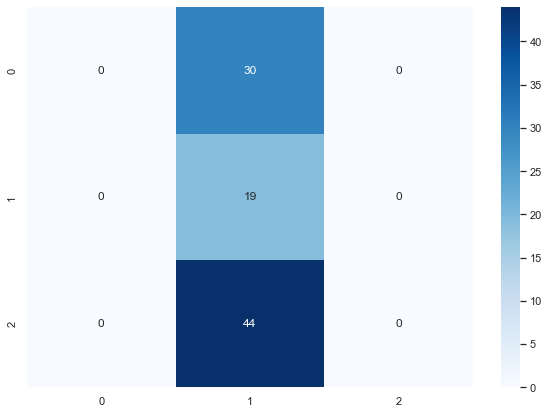

In [77]:
conf_mat = confusion_matrix(y_test, y_mbc_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

Multinomial NB is predicting most classes as class 1. Hence this is a poor performing model

From the above models, it is evident that the models are not performing well on the class 1. It might be due to the availability of samples. Hence trying the oversampling technique on the model

In [86]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [87]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 150, 1: 150, 2: 150})


In [88]:
#Making train test split
X_sampled_train, X_sampled_test, y_sampled_train, y_sampled_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)

Using the best fit knn model

In [94]:
knn_best = KNeighborsClassifier(n_neighbors = 10)
# fitting the model
knn_best.fit(X_sampled_train, y_sampled_train)
# predicting the response
y_sampled_pred = knn.predict(X_sampled_test)
# evaluating accuracy
print(accuracy_score(y_sampled_test, y_sampled_pred))
print(metrics.classification_report(y_sampled_test, y_sampled_pred))

0.8074074074074075
              precision    recall  f1-score   support

           0       0.65      0.91      0.76        45
           1       0.86      0.56      0.68        45
           2       1.00      0.96      0.98        45

    accuracy                           0.81       135
   macro avg       0.84      0.81      0.80       135
weighted avg       0.84      0.81      0.80       135



<AxesSubplot:>

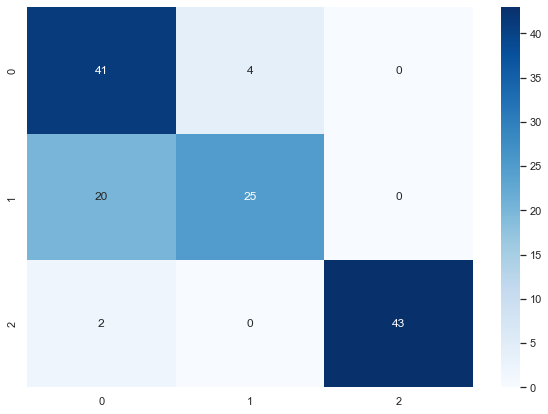

In [90]:
conf_mat = confusion_matrix(y_sampled_test, y_sampled_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

Using Logistic Regression Model

In [95]:
X_log, y_log = oversample.fit_resample(X_log, y_log)

In [97]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify =y)
model = LogisticRegression(random_state=0)
model.fit(X_log_train, y_log_train)
y_log_predict = model.predict(X_log_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)
y_log_pred = model.predict(X_log_test)
print(metrics.classification_report(y_log_test, y_log_predict))

          0         1         2         3         4         5  intercept
0  0.019787 -0.059686 -0.014649  0.079473  0.097150 -0.124276 -12.138141
1 -0.019968  0.088008 -0.007202 -0.107976 -0.074349 -0.110510  14.325161
2  0.000182 -0.028322  0.021851  0.028504 -0.022801  0.234786  -2.187020
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        45
           1       0.80      0.89      0.84        45
           2       0.98      0.96      0.97        45

    accuracy                           0.87       135
   macro avg       0.88      0.87      0.87       135
weighted avg       0.88      0.87      0.87       135



<AxesSubplot:>

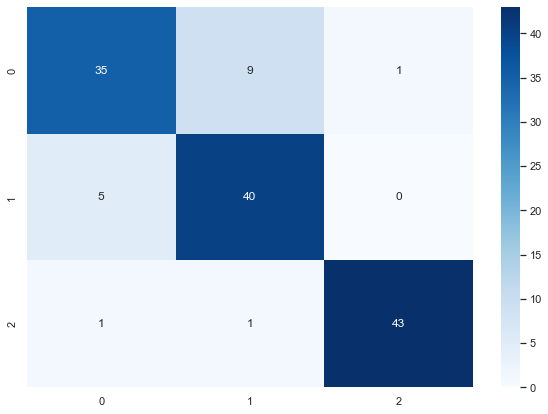

In [99]:
conf_mat = confusion_matrix(y_log_test, y_log_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

# Conclusion:
1.From the above models used, knn and logistic regressions have performed better. However, the prediction of class 1 was not good due to the imbalance in the dataset.


2.Hence, I have used SMOTE oversampling technique to do balance the imbalance.


3.From the above it is evident that logistic regression is a better performing model with f1-score above 80 percent for all the three classes